In [27]:
#All the imports and data import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
import sklearn.metrics as met
from tabulate import tabulate

import os, sys

cwd = os.getcwd()
#URI = (cwd+"\\train.csv")
URI = (cwd+"\\train_standardscaler.csv")
#URI = (cwd+"\\train_minmaxscaler.csv")
film_data = pd.read_csv(URI, dtype={"Lead":str}).dropna().reset_index(drop=True)

x = film_data.drop(columns=['Lead'])
y = film_data['Lead']





In [46]:
np.random.seed(1)


#Choosing 85% random row numbers
train_size = (film_data.shape[0]*85)//100
train_rows = np.random.choice(film_data.shape[0], size=train_size, replace=False)

#Creating a bool array where True means that that row is in training data
train_index = film_data.index.isin(train_rows)
train_set = film_data.iloc[train_index]
test_set = film_data.iloc[~train_index]

x_train = x.iloc[train_index]
y_train = y.iloc[train_index]
x_test = x.iloc[~train_index]
y_test = y.iloc[~train_index]


In [ ]:
#Here I do feature selection

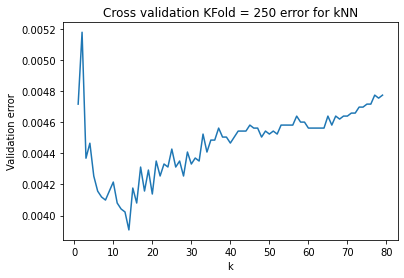

AttributeError: 'list' object has no attribute 'any'

In [59]:
#Here I do Kfold cross validation
n_folds = 250

Kfold_cv= skl_ms.KFold(shuffle=True,n_splits=n_folds,)

#Testing k in range *
k_range = np.arange(1,80)

missclassification_error = np.zeros(len(k_range))



for train_index, val_index in Kfold_cv.split(x):
	x_train, x_val = x.iloc[train_index], x.iloc[val_index]
	y_train, y_val = y.iloc[train_index], y.iloc[val_index]
	
	for index, k in enumerate(k_range):
		model = skl_nb.KNeighborsClassifier(n_neighbors=k)
		model.fit(x_train, y_train)
		prediction = model.predict(x_val)
		missclassification_error[index] += np.mean(prediction != y_val)

missclassification_error /= n_folds
plt.plot(k_range, missclassification_error)
plt.title(f"Cross validation KFold = {n_folds} error for kNN")
plt.xlabel("k")
plt.ylabel("Validation error")
plt.show() 

min_error = np.min(missclassification_error)
min_error_k = [i for i, x in enumerate(missclassification_error) if x == min_error] [0]+1


print_table = [["Term","Value"],
                ["'Postive class'", "Male"],
                ["Optimal k", min_error_k],
                ["E[error_new]", min_error]]

print(tabulate(print_table, headers=("firstrow")))


I wan't to choose my hyper variables, which is "k" in this setting. 

I will choose "k" with the use of the "leave one out" method of cross validation

In [56]:
loo = skl_ms.LeaveOneOut()
#print(loo)

#Testing k in range 1-20
k_range = np.arange(1,30)

missclassification_error = np.zeros(len(k_range))

n_folds = loo.get_n_splits(x)

for train_index, val_index in loo.split(x):
	x_train, x_val = x.iloc[train_index], x.iloc[val_index]
	y_train, y_val = y.iloc[train_index], y.iloc[val_index]
	
	for index, k in enumerate(k_range):
		model = skl_nb.KNeighborsClassifier(n_neighbors=k)
		model.fit(x_train, y_train)
		prediction = model.predict(x_val)
		missclassification_error[index] += np.mean(prediction != y_val)

missclassification_error /= n_folds
plt.plot(k_range, missclassification_error)
plt.title("Cross validation LeaveOneOut error for kNN")
plt.xlabel("k")
plt.ylabel("Validation error")
plt.show() 

min_error = np.min(missclassification_error)
min_error_k = [i for i, x in enumerate(missclassification_error) if x == min_error] [0]+1

print_table = [["Term","Value"],
                ["'Postive class'", "Male"],
                ["Optimal k", min_error_k],
                ["E[error_new]", min_error]]

print(tabulate(print_table, headers=("firstrow")))

KeyboardInterrupt: 

Printing important valuables

Heatmap as crosstab validation

Evaluation Term       Value
--------------------  -------
Optimal k             12
'Postive class'       Male
Total Positive class  116
Total Negative class  40
True Positive         19
False Positive        21
False Negative        3
True Positive         113
<class 'numpy.ndarray'>


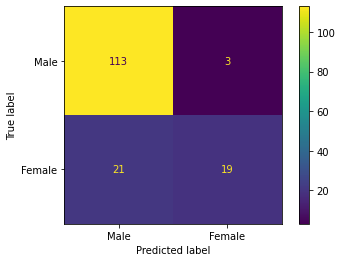

In [54]:
##Here I do crosstab valuation, ROC curve, etc
K= min_error_k

model = skl_nb.KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

predict_prob = model.predict_proba(x_test)[::,1]



#Evaluation terms:
positive_class = "Male"
negative_class = "Female"

P = np.sum(y_test == positive_class)
N = np.sum(y_test == negative_class)

TN, FP, FN, TP = met.confusion_matrix(y_test,prediction).ravel()


cm= met.confusion_matrix(y_test,prediction, labels=[positive_class, negative_class])

disp = met.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[positive_class, negative_class])

predict_prob = model.predict_proba(x_test)[::,1]
FPR, TPR, threshold = met.roc_curve(y_test,  predict_prob, pos_label="Male" )

disp.plot()

pd.crosstab(y_test, prediction, margins=True)


Table_eval_terms = [["Evaluation Term","Value"],
                    ["Optimal k", 12],   #min_error_k
                    ["'Postive class'", "Male"],
                    ["Total Positive class", P],
                    ["Total Negative class", N],
                    ["True Positive", TN],
                    ["False Positive", FP],
                    ["False Negative", FN],
                    ["True Positive", TP]]


print(tabulate(Table_eval_terms, headers=("firstrow")))


print(type(cm))

Two ways of doing a ROC-curve, first is built in functions the other is manual. 

Because value of 'r' doesn't matter to kNN, plotting of The precision-recall curve is not performed

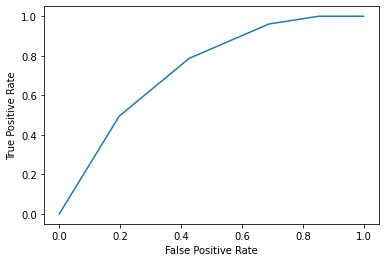

1


Text(0, 0.5, 'True positive rate')

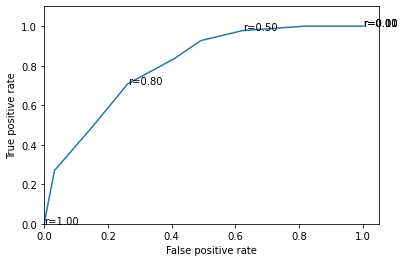

In [38]:
K =12


#ROC CURVE, AUTOMATIC
model = skl_nb.KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

predict_prob = model.predict_proba(x_test)[::,1]
FPR, TPR, threshold = met.roc_curve(y_test,  predict_prob, pos_label="Male" )

#create ROC curve
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#ROC CURVE MANUALLY

true_positive_rate = []
false_positive_rate = []

positive_class = "Male"
negative_class = "Female"

P = np.sum(y_test == positive_class)
N = np.sum(y_test == negative_class)

threshold = np.linspace(0,1,101)
model = skl_nb.KNeighborsClassifier(n_neighbors=12)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

predict_prob = model.predict_proba(x_test)

positive_class_index = np.argwhere(model.classes_== positive_class).squeeze()
print(positive_class_index)

for r in threshold:
    prediction = np.where(predict_prob[:, positive_class_index]> r, positive_class, negative_class)
    FP = np.sum((prediction == positive_class) & (y_test == negative_class))
    TP = np.sum((prediction == positive_class) & (y_test == positive_class))
    false_positive_rate.append(FP/N)
    true_positive_rate.append(TP/P)

plt.plot(false_positive_rate, true_positive_rate);
for idx in [0,1,10,50,80,100]:
    plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")

plt.xlim([0,1.05])
plt.ylim([0,1.1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [63]:

def evaluate_with_kfold(x, y, n_folds=None, k_max=None):
    if n_folds==None:
        n_folds=x.shape[0]//4
    if k_max == None:
        k_max= x.shape[1]*4


    Kfold_cv = skl_ms.KFold(shuffle=True,n_splits=n_folds)
    k_range = np.arange(1,k_max)
    missclassification_k_error = np.zeros(len(k_range))
    
    for train_index, val_index in Kfold_cv.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[val_index]
        y_train, y_test = y.iloc[train_index], y.iloc[val_index]
        
        temp_missclassification_k_error = evaluate_k_kNN(k_range,x_train, y_train, x_test, y_test)
        missclassification_k_error = np.add(missclassification_k_error,temp_missclassification_k_error)
    
    missclassification_k_error /= n_folds
    
    return missclassification_k_error
        
        


def evaluate_k_kNN(k_range,x_train, y_train, x_test, y_test):
    missclassification_k_error = np.zeros(len(k_range))
    for index, k in enumerate(k_range):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        missclassification_k_error[index] += get_mean_missclassification(model,x_test,y_test)
    
    return missclassification_k_error


def get_mean_missclassification(model,x_test,y_test):
    prediction = model.predict(x_test)
    mean_missclassification =  np.mean(prediction != y_test)
    return mean_missclassification


def get_evaluation_terms(model, x_test, y_test, positive_class, negative_class):
    prediction = model.predict(x_test)
    predict_prob = model.predict_proba(x_test)[::,1]
    P = np.sum(y_test == positive_class)
    N = np.sum(y_test == negative_class)
    TN, FP, FN, TP = met.confusion_matrix(y_test,prediction).ravel()
    return P, N, TN, FP, FN, TP


def find_best_k( missclassification_k_error):
    min_error = np.min(missclassification_k_error)
    min_error_k = [i for i, x in enumerate(missclassification_k_error) if x == min_error] [0]+1

    return min_error_k


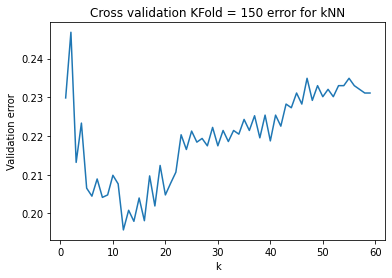

Term             Value
---------------  -------
'Postive class'  Male
Optimal k        12
E[error_new]     0


In [66]:


cwd = os.getcwd()
#URI = (cwd+"\\train.csv")
URI = (cwd+"\\train_standardscaler.csv")
#URI = (cwd+"\\train_minmaxscaler.csv")
film_data = pd.read_csv(URI, dtype={"Lead":str}).dropna().reset_index(drop=True)

x = film_data.drop(columns=['Lead'])
y = film_data['Lead']

k_max = 60
n_folds = 150

missclassification_k_error = evaluate_with_kfold(x, y, n_folds, k_max)

plt.plot(np.arange(1,k_max), missclassification_k_error)
plt.title(f"Cross validation KFold = {n_folds} error for kNN")
plt.xlabel("k")
plt.ylabel("Validation error")
plt.show() 


min_error_k = find_best_k(missclassification_k_error)


print_table = [["Term","Value"],
                ["'Postive class'", "Male"],
                ["Optimal k", min_error_k],
                ["E[error_new]", 0.1]]

print(tabulate(print_table, headers=("firstrow")))